In [ ]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
import scipy.sparse as sps
import scipy.sparse.linalg as LAS

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


h =  0.1
D k / h2 =  0.09999999999999998


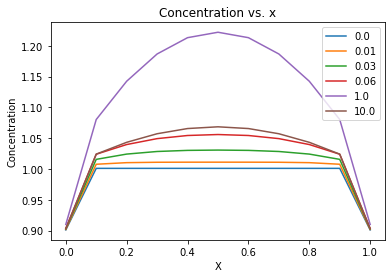

[[0.901      1.001      1.001      1.001      1.001      1.001
  1.001      1.001      1.001      1.001      0.901     ]
 [0.90172648 1.00768329 1.01025196 1.01090725 1.01103401 1.01105056
  1.01103401 1.01090725 1.01025196 1.00768329 0.90172648]
 [0.9025591  1.01562086 1.0241842  1.0284061  1.03021068 1.03069553
  1.03021068 1.0284061  1.0241842  1.01562086 0.9025591 ]
 [0.90343169 1.02395815 1.03969563 1.04929966 1.05438359 1.05596286
  1.05438359 1.04929966 1.03969563 1.02395815 0.90343169]
 [0.90987275 1.08034029 1.14253541 1.18680283 1.21329983 1.22212155
  1.21329983 1.18680283 1.14253541 1.08034029 0.90987275]
 [0.90287283 1.02412886 1.04331029 1.05723415 1.06567782 1.06850729
  1.06567782 1.05723415 1.04331029 1.02412886 0.90287283]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.        ]
 [1.         

In [ ]:
# Setup basic domain
L = 1
D = 1

N = 10     # Number of lattice points
h = L / N  # Spatial step size

# Create the x-grid
x = np.linspace(0, L, N+1)

# Setup final solution time + time-step
tf = 10
k  = 0.001
n_steps = round(tf / k)

# Print the stability condition; Recall that this ratio must be less than 1/2
print('h = ', h)
print('D k / h2 = ', (D * k / h**2))

# Setup to create a movie
n_frames = 10
frame_step = round(n_steps / n_frames)
store_times = [0*n_steps/10,0.01*n_steps/10, 0.03*n_steps/10, 0.06*n_steps/10, 1.0*n_steps/10, 10*n_steps/10]

# Assemble the matrix
d1 = (1.0 - (2. * D * k / h**2)) * np.ones(N+1)
d2 = (D * k / h**2) * np.ones(N)

# Assemble the matrices -> See documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html
A = sps.diags((d2, d1, d2), offsets=(-1, 0, 1))

# Create initial condition
# Vector w(:) will contain solution estimate of u
# w[0] = 0; w[N] = 0
w  = np.ones(N + 1)

# Set initial condition
w[0] = 1
w[N] = 1

#Add source term
S = np.ones(N+1)

concentration = np.ones((14,N+1))
a = 0 

for i in range(0, N+1):
    w[i] = 1

for j in range(n_steps + 1):
    w[:] = A.dot(w) + (k*(1 + np.sin(j*k))*S)
    
    if(j in store_times):
        time = j*10/n_steps
        plt.plot(x, w, label=str(time))
        concentration[a,:] = w
        a = a + 1
        
    # enforce BC
    w[0] = 1
    w[N] = 1
    
#plt.plot(x, w)
plt.title('Concentration vs. x')
plt.xlabel('X')
plt.ylabel('Concentration')
plt.legend()
plt.show()
print(concentration)